<a href="https://colab.research.google.com/github/Sumin0411/SKTFlyAI/blob/main/03_KNN_binary_irisbin(12_26).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget https://raw.githubusercontent.com/devdio/datasets/main/iris_bin.csv

--2023-12-26 08:26:07--  https://raw.githubusercontent.com/devdio/datasets/main/iris_bin.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2629 (2.6K) [text/plain]
Saving to: ‘iris_bin.csv’

iris_bin.csv        100%[===================>]   2.57K  --.-KB/s    in 0s      

2023-12-26 08:26:07 (32.1 MB/s) - ‘iris_bin.csv’ saved [2629/2629]



In [ ]:
iris_bin = pd.read_csv('iris_bin.csv')

In [ ]:
iris_bin.shape

(100, 4)

In [ ]:
df = iris_bin.copy()
df.head()

,Id,sepal_length,sepal_width,species
0,1,5.1,3.5,Iris-setosa
1,2,4.9,3.0,Iris-setosa
2,3,4.7,3.2,Iris-setosa
3,4,4.6,3.1,Iris-setosa
4,5,5.0,3.6,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   sepal_length  100 non-null    float64
 2   sepal_width   100 non-null    float64
 3   species       100 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.2+ KB


In [ ]:
df.describe()

,Id,sepal_length,sepal_width
count,100.000000,100.000000,100.000000
mean,50.500000,5.471000,3.094000
std,29.011492,0.641698,0.476057
min,1.000000,4.300000,2.000000
25%,25.750000,5.000000,2.800000
50%,50.500000,5.400000,3.050000
75%,75.250000,5.900000,3.400000
max,100.000000,7.000000,4.400000


In [ ]:
df.isna().sum(axis = 0)

Id              0
sepal_length    0
sepal_width     0
species         0
dtype: int64

In [ ]:
df.head()

,Id,sepal_length,sepal_width,species
0,1,5.1,3.5,Iris-setosa
1,2,4.9,3.0,Iris-setosa
2,3,4.7,3.2,Iris-setosa
3,4,4.6,3.1,Iris-setosa
4,5,5.0,3.6,Iris-setosa


In [ ]:
df['sepal_length'].value_counts()

5.0    10
5.1     9
5.5     7
5.7     7
5.4     6
4.8     5
4.9     5
5.6     5
4.6     4
6.1     4
5.8     4
6.0     4
5.2     4
4.4     3
6.3     3
6.7     3
4.7     2
6.4     2
5.9     2
6.2     2
6.6     2
5.3     1
6.5     1
6.9     1
7.0     1
4.5     1
4.3     1
6.8     1
Name: sepal_length, dtype: int64

In [ ]:
df = df.sample(frac = 1)
df.head()

,Id,sepal_length,sepal_width,species
70,71,5.9,3.2,Iris-versicolor
86,87,6.7,3.1,Iris-versicolor
10,11,5.4,3.7,Iris-setosa
49,50,5.0,3.3,Iris-setosa
43,44,5.0,3.5,Iris-setosa


In [ ]:
#입력 타겟값 분리
y = df['species']
y.head()

70    Iris-versicolor
86    Iris-versicolor
10        Iris-setosa
49        Iris-setosa
43        Iris-setosa
Name: species, dtype: object

In [ ]:
X = df[['sepal_length', 'sepal_width']]
X.head()

,sepal_length,sepal_width
70,5.9,3.2
86,6.7,3.1
10,5.4,3.7
49,5.0,3.3
43,5.0,3.5


In [ ]:
X.shape, y.shape

((100, 2), (100,))

In [ ]:
idx = int(len(X)*0.8)

X_train = X[:idx]
X_test = X[idx:]

In [ ]:
y_train = y[:idx]
y_test = y[idx:]

In [ ]:
y_train.shape, X_train.shape, y_test.shape, X_test.shape

((80,), (80, 2), (20,), (20, 2))

In [ ]:
# scaling
# train과 val, test 시 같은 scaling 필요
# z score


u = dict()
std = dict()

for c in X_train.columns:
    u[c] = X_train[c].mean()
    std[c] = X_train[c].std()
    X_train[c] = (X_train[c] - u[c])/std[c]

In [ ]:
# encoding

y_train = y_train.map({'Iris-setosa':0, 'Iris-versicolor':1})
y_train.head()

70    1
86    1
10    0
49    0
43    0
Name: species, dtype: int64

In [ ]:
X_train = X_train.values
y_train = y_train.values
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [ ]:
# algorithm
#base model 학습

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
for c in X_test.columns:
    X_test[c] = (X_test[c] - u[c])/std[c]

In [ ]:
y_test = y_test.map({'Iris-setosa':0, 'Iris-versicolor':1})

In [ ]:
X_test.head()

,sepal_length,sepal_width
12,-0.999635,-0.276541
58,1.800899,-0.491330
60,-0.688465,-2.424434
51,1.489729,0.153037
31,-0.066124,0.582616


In [ ]:
y_test.head()

12    0
58    1
60    1
51    1
31    0
Name: species, dtype: int64

In [ ]:
# val
X_test = X_test.values
y_test = y_test.values

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_pred[:20]

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1])

In [ ]:
y_test[:20]

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [ ]:
np.sum(y_test == y_pred)/len(y_test)

0.95

In [ ]:
# 오차행렬
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
cf

array([[ 8,  0],
       [ 0, 12]])

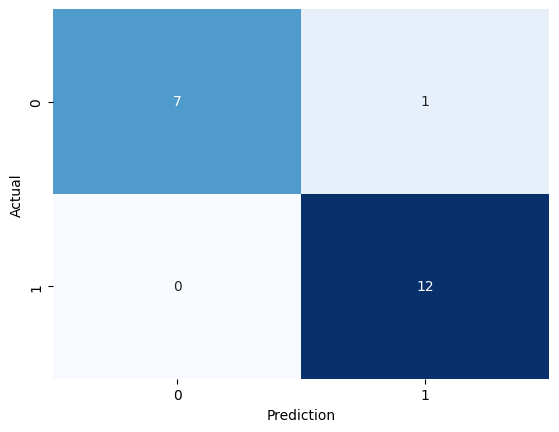

In [ ]:
s = sns.heatmap(cf, annot=True, cmap="Blues", fmt = 'd', cbar=False)
s.set(xlabel="Prediction", ylabel="Actual")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [ ]:
acc = accuracy_score(y_test, y_pred)
re = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"acc : {acc}")
print(f"re : {re}")
print(f"prec : {prec}")
print(f"f1 : {f1}")

acc : 0.95
re : 1.0
prec : 0.9230769230769231
f1 : 0.9600000000000001


In [ ]:
# algorithm
from sklearn.neighbors import KNeighborsClassifier

score = []
for k in range(3, 30):
    clf_k = KNeighborsClassifier(n_neighbors = k)
    clf_k.fit(X_train, y_train)
    y_pred = clf_k.predict(X_test)

    cf = accuracy_score(y_test, y_pred)
    score.append(cf)

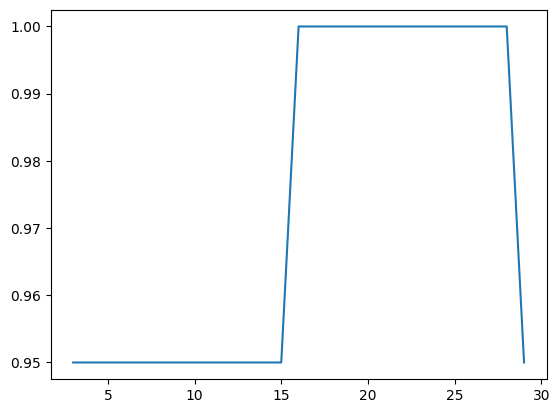

In [ ]:
plt.plot(range(3, 30), score)

In [ ]:
best_clf = KNeighborsClassifier(n_neighbors = 25)
best_clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)

cf = accuracy_score(y_test, y_pred)
print(cf)


1.0
